In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
# load dataset
df = pd.read_csv("parkinsons.csv") 
df.head()




,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [28]:
df.columns

Index(['topLeft', 'topMiddle', 'topRight', 'middleLeft', 'middleMiddle',
       'middleRight', 'bottumLeft', 'bottomMiddle', 'bottomrRight', 'Outcome'],
      dtype='object')

In [9]:
#split dataset in features and target variable
x_data=df[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE']]
y_data=df['status']


In [10]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1) # 70% training and 30% test


In [15]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [16]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9322033898305084


# **Visualizing Decision Trees**

In [17]:
!pip install graphviz
!pip install pydotplus
!pip install six

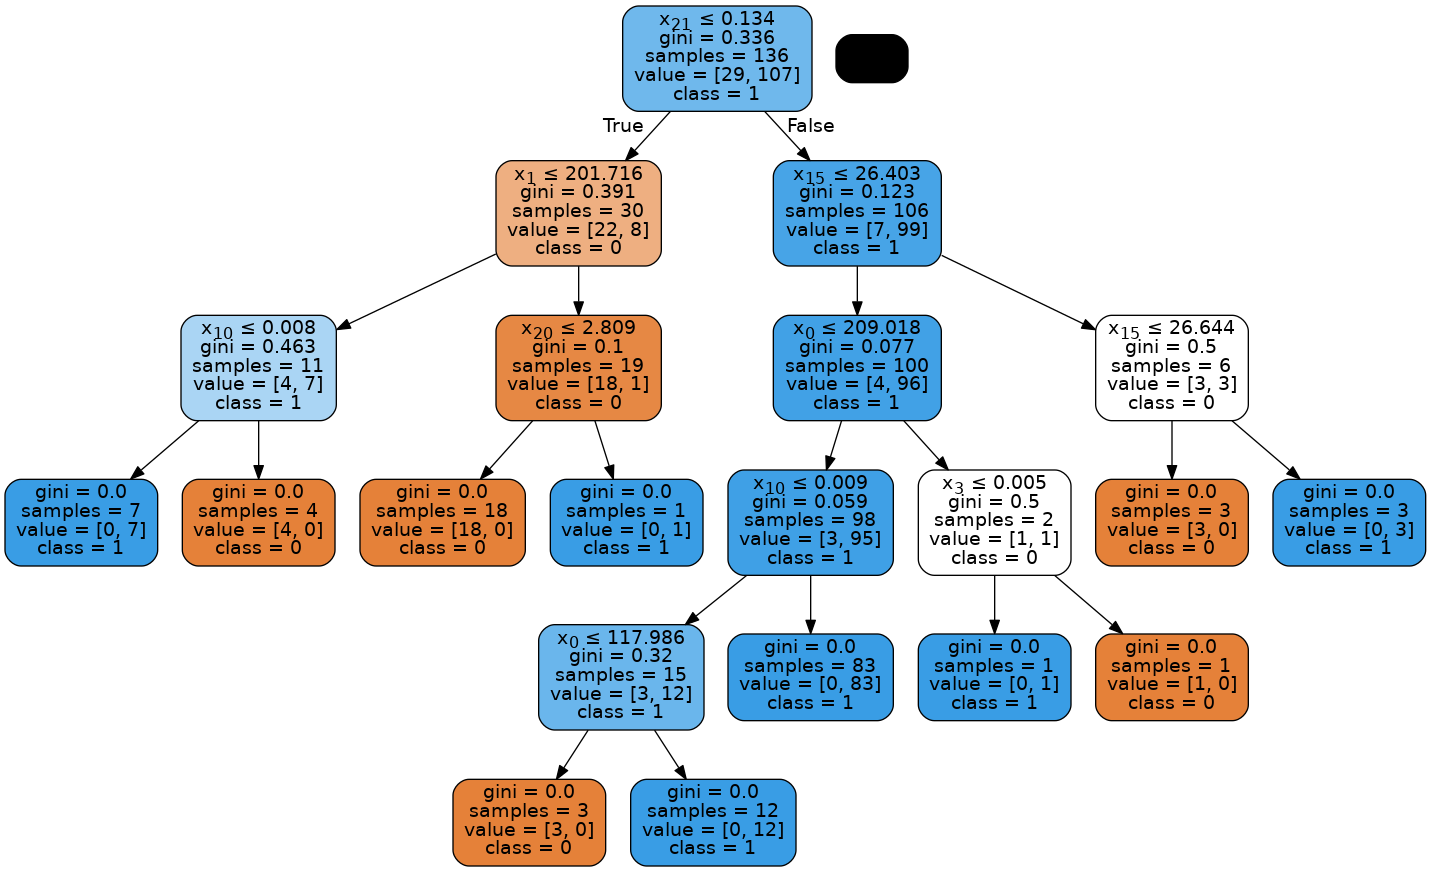

In [18]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tictactoe.png')
Image(graph.create_png())

This is our initial flow chart, because we have not added much in the ways of moddifiers to the data flow classification method, it includes several leaves with only 1 sample. Given that this data set is slightly smaller that isn't as bad, but I to make the chart a bit more palletable I will be making the minimum samples per leaf 3. I will also be trying to reduce the number of features applicable to make the data easier to interpret, without compromising on too much of our accuracy. I lastly decided to apply a min samples split of 10. Lastly to make the interpretation simpler I will be imposing a maximum depth of 4, this will hurt on accuracy but should still retain most of its accuracy. 

In [40]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(min_samples_leaf=3,max_features=9,min_samples_split=10,max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [41]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8135593220338984


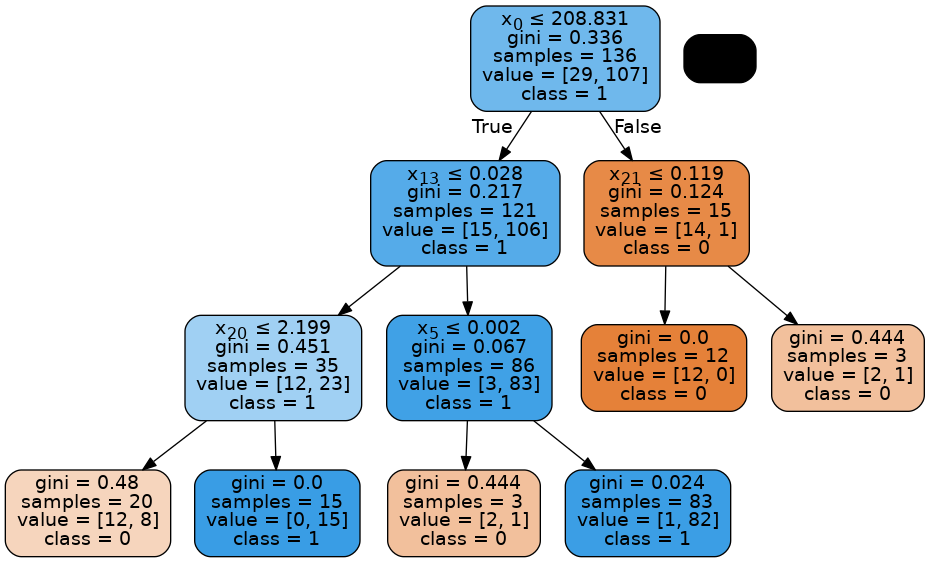

In [42]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tictactoe.png')
Image(graph.create_png())

Interpretation: 

Layer 0 is the root layer.  
 x0  <= 208.831. x0 is MDVP:Fo(Hz) which is the frequency record from voice recording. When MDVP:Fo(Hz) values are less than or equal to 208.831 they will go to the left which is a predominantly class 1 - True Category. and if greater, will go to the right in a predominantly negative outcome. 

Layer 1:
x13 <= 0.028 x13 represents AMPV which is variation in amplitude. This stem splits into two class 1 class stems which will further divide. 

x21 <= 0.119  x21 represents spread1 which is one of three  nonlinear measures of fundamental frequency variation in the dataset It splits into two class 0 leafs that terminate, and represents 15 samples. 
         

Layer 2:
x20  <= 2.199 x20 represents DFS which is the Signal fractal scaling exponent this stem splits into  true - class 0 with 20 samples and false  - class 1 leaf with 15 samples. 
x5   <= 0.002  x5 represents MDVP:Jitter(Abs) an absolutve value of jitter variation in fundamental frequency. this stem splits into a true - class 0 leaf with 3 samples. and false - class 1 leaf with 83 samples. 